# Visualizing Geospatial Data
inspired from scipy2018-geospatial and geographic data science book

**goals of the tutorial**
- plot a map with matplotlib
- points rappresentation
- choropleth map


**based on the open data of:**
- ISTAT Italian National Institute of Statistic
- [AirBnB data](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/data/airbnb/airbnb_trentino_alto_adiige_may2019.csv) of Trentino Alto Adige - May 2019 by [Vincenzo Patruno](https://medium.com/@vincpatruno)
- [covid-19](https://github.com/pcm-dpc/COVID-19) - Italian Department of Civil Protection

**requirements**
- python knowledge
- geopandas

**suggestion**<br/>
follow the [30DayMapChallenge](https://github.com/tjukanovt/30DayMapChallenge) - daily social mapping project in November 2020 - hashtag Twitter [#30DayMapChallege](https://twitter.com/hashtag/30DayMapChallenge) 




**status**<br/>
"*the map is not the territory*" 

---



# Packages to use
- pandas
- geoplot
- geopandas
- contextily 
- seaborn
- sklearn
- mapclassify


In [92]:
import warnings
warnings.simplefilter("ignore")

In [93]:
import contextily
contextily.__version__
try:
  import contextily 
except ModuleNotFoundError as e:
  !pip install contextily==1.1.0
  import contextily

if contextily.__version__ != "1.1.0":
  !pip install -U contextily==1.1.0
  import contextily 

In [94]:
try:
  import geopandas as gpd
except ModuleNotFoundError as e:
  !pip install geopandas==0.10.1
  import geopandas as gpd

if gpd.__version__ != "0.10.1":
  !pip install -U geopandas==0.10.1
  import geopandas as gpd

In [95]:
try:
  import seaborn as sbn
except ModuleNotFoundError as e:
  !pip install seaborn==0.11.1
  import seaborn as sbn

if sbn.__version__ != "0.11.1":
  !pip install -U seaborn==0.11.1
  import seaborn as sbn

In [96]:
try:
  import sklearn
except ModuleNotFoundError as e:
  !pip install sklearn==1.0
  import sklearn

if sklearn.__version__ != "1.0":
  !pip install -U sklearn==0.11.1
  import sklearn

In [97]:
try:
  import mapclassify
except ModuleNotFoundError as e:
  !pip install mapclassify
  import mapclassify

if mapclassify.__version__ != "2.4.3":
  !pip install -U mapclassify==2.4.3


# Basic data visualization 

In [98]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
url_airbnb_trentino = "https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/data/airbnb/airbnb_trentino_alto_adiige_may2019.csv"

In [100]:
airbnb_trentino = pd.read_csv(url_airbnb_trentino)

In [101]:
airbnb_trentino.head(3)

reviews_count bathrooms  property_type_id currency        lng        id  \
0              0         1               1.0      EUR  12.213819  33210741   
1              0         1              47.0      EUR  11.098980  25164192   
2              5         1               1.0      EUR  11.846660  31115034   

       city        date  localized_neighborhood rate_type  ...  beds  amount  \
0    Casies  15/04/2019                     NaN   nightly  ...   1.0      80   
1   Lagundo  15/04/2019                     NaN   nightly  ...   4.0     158   
2  Colfosco  15/04/2019                     NaN   nightly  ...   1.0      64   

   weekly_price_factor  nscrap person_capacity                host_languages  \
0                 1.00  apr-19               2                            []   
1                 1.00  apr-19               4                            []   
2                 0.95  apr-19               2  [u'en', u'fr', u'de', u'it']   

   is_host_highly_rated is_new_listing            comune pro_com  
0                 False           True   Valle di Casies   21109  
1                 False          False           Lagundo   21038  
2                  True          False  Corvara in Badia   21026  

[3 rows x 30 columns]

In [102]:
geo_airbnb = gpd.GeoDataFrame(airbnb_trentino,crs='EPSG:4326', geometry=gpd.points_from_xy(airbnb_trentino.lng, airbnb_trentino.lat))

## plot

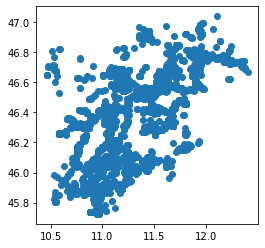

In [103]:
geo_airbnb.plot()
plt.show()

## change colors

![](https://matplotlib.org/stable/_images/sphx_glr_colors_003_2_0x.png)


[view documentation](https://matplotlib.org/stable/tutorials/colors/colors.html)

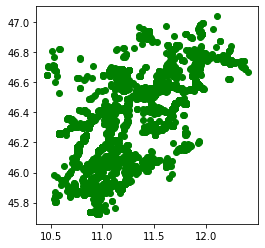

In [104]:
geo_airbnb.plot(color="green")
plt.show()

![](https://xkcd.com/s/0b7742.png)

... everybody loves XKCD

Colors<br/>
[https://xkcd.com/color/rgb/](https://xkcd.com/color/rgb/)

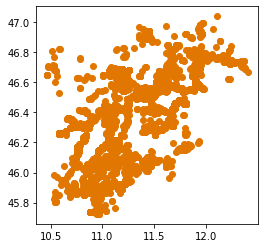

In [105]:
ax = geo_airbnb.plot(color="xkcd:pumpkin")

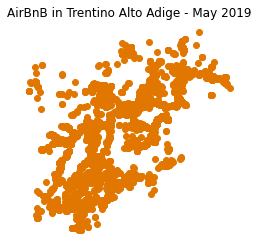

In [106]:
ax = geo_airbnb.plot(color="xkcd:pumpkin")
ax.set_axis_off()
ax.set_title('AirBnB in Trentino Alto Adige - May 2019')
plt.show()

# add background maps

## Tile Map Service - TMS



[Tile Map Service](https://wiki.osgeo.org/wiki/Tile_Map_Service_Specification)


<img src="https://www.spatineo.com/wp-content/uploads/2015/12/TilePyramid.jpg" width=500px />


Supported scheme: 

*http://{**s**}.**domain.com**/{**z**}/{**x**}/{**y**}.png*

- **s** => subdomain (in there are more as one tms server - usualy a.domain.com b.domain.com ...)
- **domain.com** => the domain (eg. openstreetmap.org)
- **z** => zoom level
- **x** =>  column
- **y** => row

Eg:<br/>
&nbsp;&nbsp;&nbsp;https://tile.openstreetmap.org/18/139191/93190.png

![](https://tile.openstreetmap.org/18/139191/93190.png)



You can use in geopandas with [contextily](https://contextily.readthedocs.io/en/latest/)

In [107]:
import contextily as ctx

In [108]:
geo_airbnb.crs.to_string()

'EPSG:4326'

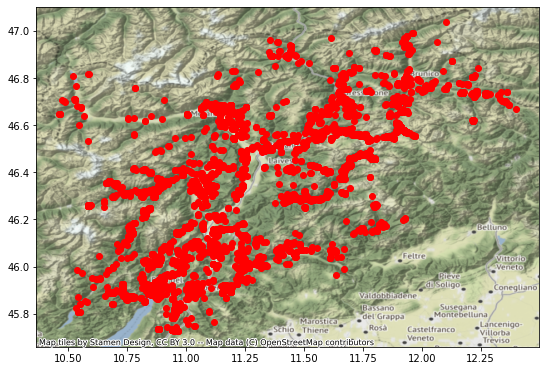

In [109]:
ax = geo_airbnb.plot(color="red", figsize=(9, 9))
ctx.add_basemap(ax, crs=geo_airbnb.crs.to_string())

In [110]:
ctx.providers.keys()

dict_keys(['OpenStreetMap', 'OpenSeaMap', 'OpenPtMap', 'OpenTopoMap', 'OpenRailwayMap', 'OpenFireMap', 'SafeCast', 'Thunderforest', 'OpenMapSurfer', 'Hydda', 'MapBox', 'Stamen', 'Esri', 'OpenWeatherMap', 'HERE', 'FreeMapSK', 'MtbMap', 'CartoDB', 'HikeBike', 'BasemapAT', 'nlmaps', 'NASAGIBS', 'NLS', 'JusticeMap', 'Wikimedia', 'GeoportailFrance', 'OneMapSG'])

In [111]:
ctx.providers.OpenStreetMap.keys()

dict_keys(['Mapnik', 'DE', 'CH', 'France', 'HOT', 'BZH'])

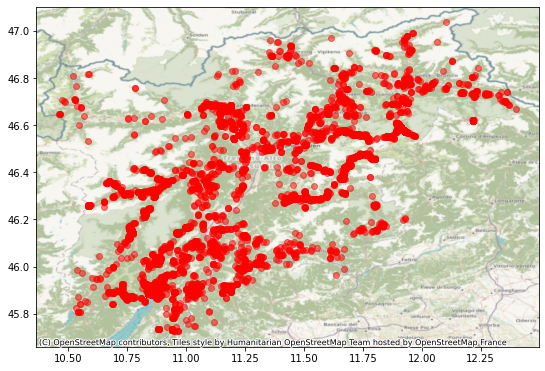

In [112]:
ax = geo_airbnb.plot(alpha=0.5, color="red", figsize=(9, 9))
ctx.add_basemap(ax,crs=geo_airbnb.crs.to_string(),
               source=ctx.providers.OpenStreetMap.HOT)

## WGS 84 / Pseudo-Mercator
*Spherical Mercator, Google Maps, OpenStreetMap, Bing, ArcGIS, ESRI*

[EPSG:3857](http://epsg.io/3857)

![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/87/Tissot_mercator.png/600px-Tissot_mercator.png)

Variation with latitude of represented distances (in degrees or pixels) on the Mercator projection per actual distances (in meters) on Earth surface.

https://wiki.openstreetmap.org/wiki/Zoom_levels


|  Level |	# Tiles |	Tile width<br/>(° of longitudes) |	m / pixel<br/>(on Equator) |	~ Scale<br/>(on screen) | 	Examples of<br/>areas to represent 	|
|-  |-	|- |- |- |- |   
|0 	|1 	|360 	|156 |412 	|1:500 million |	whole world|
|1 	|4 	|180 	|78.206 |1:250 million| | 	
|2 	|16 |90 	|39.103 |1:150 million |subcontinental area|
|3 	|64 |45 	|19.551 |1:70 million |largest country|
|4 	|256 |22.5 	|9.776 |1:35 million | |	
|5 	|1.024 |11.25 	|4.888 	|1:15 million |large African country|
|6 	|4.096 	|5.625 	|2.444 	|1:10 million |large European country|
|7 	|16.384 |2.813 	|1.222 	|1:4 million 	|small country, US state|
|8 	|65.536 |1.406 	|610.984 	|1:2 million| | 	
|9 	|262.144 |0.703 	|305.492 	|1:1 million |wide area, large metropolitan area|
|10 | 1.048.576 |0.352 	|152.746 	|1:500 thousand |metropolitan area|
|11	| 4.194.304 |0.176 	|76.373 	|1:250 thousand |city|
|12 | 16.777.216 |0.088 	|38.187 	|1:150 thousand |town, or city district|
|13 | 67.108.864 	|0.044 	|19.093 	|1:70 thousand |village, or suburb|
|14 | 268.435.456 	|0.022 	|9.547 	|1:35 thousand 	| |
|15 | 1.073.741.824 	|0.011 	|4.773 	|1:15 thousand |small|road|
|16 | 4.294.967.296 	|0.005 	|2.387 	|1:8 thousand 	|street|
|17 |17.179.869.184 	|0.003 	|1.193 	|1:4 thousand 	|block, park, addresses|
|18 |68.719.476.736 	|0.001 	|0.596 	|1:2 thousand |some buildings, trees|
|19 |274.877.906.944 	|0.0005 	|0.298 	|1:1 thousand|	local highway and crossing details|
|20 |1.099.511.627.776 	|0.00025 	|0.149 	|1:5 hundred |A mid-sized building |

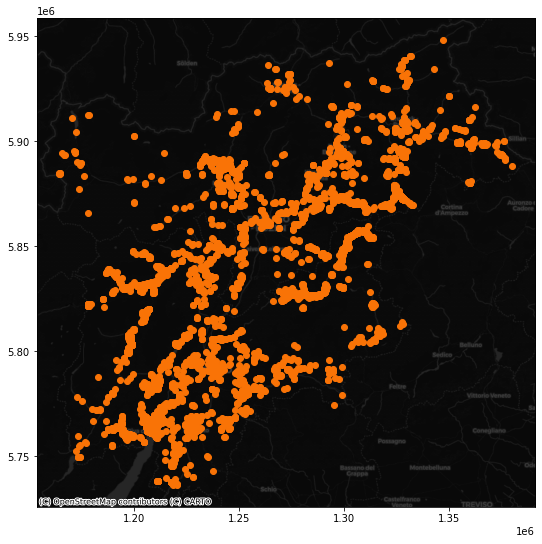

In [113]:
ax = geo_airbnb.to_crs(epsg=3857).plot(color='xkcd:orange',figsize=(9,9))
ctx.add_basemap(ax,crs=geo_airbnb.to_crs(epsg=3857).crs.to_string(),
               source=ctx.providers.CartoDB.DarkMatter)

# Visualize dots (with seaborn)

create a scatterplot to know the spatial distributions of the points

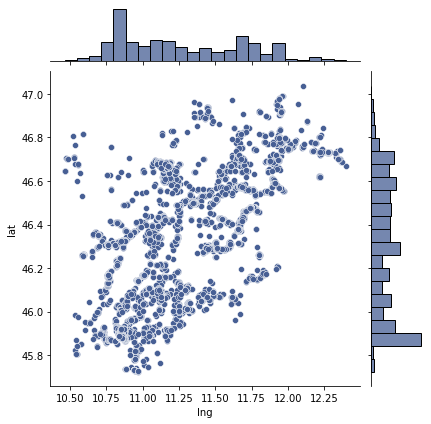

In [114]:
sns.jointplot(x='lng', y='lat', color="xkcd:dusky blue", data=geo_airbnb);

this representation helps to understand where there are more points (not understandable at the proposed scale level)



## add the points on a background map
the main background available online use the pseudo mercator reference system - [epsg:3857](https://epsg.io/3857)

so we prepare the data to have x and y in epsg:3857

In [115]:
geo_airbnb['x'] = geo_airbnb.to_crs(epsg=3857).geometry.x
geo_airbnb['y'] = geo_airbnb.to_crs(epsg=3857).geometry.y

### Download map tiles 
by using the method *bounds2img* with [contextily](https://contextily.readthedocs.io/en/latest/)

definition of the bounding box to donwload the background image



In [116]:
bounding_box = [geo_airbnb.x.min(), geo_airbnb.y.min(), geo_airbnb.x.max(), geo_airbnb.y.max()]

download the background image - the original CRS is EPSG:3857

In [117]:
basemap, basemap_extent = ctx.bounds2img(*bounding_box, zoom=10,source = ctx.providers.Stamen.Toner)

- *basemap* is an array containing the raw image data for a basemap of the area
- *basemap_extent* is the boundary of that image

create a bounding box to define the extent of the data <br/>
In this case is the same of the bounding box.<br/>
It can be used to zoom the map on the data extent


In [118]:
data_extent = [geo_airbnb.x.min(), geo_airbnb.x.max(), geo_airbnb.y.min(), geo_airbnb.y.max()]

### plot dots
over the background image

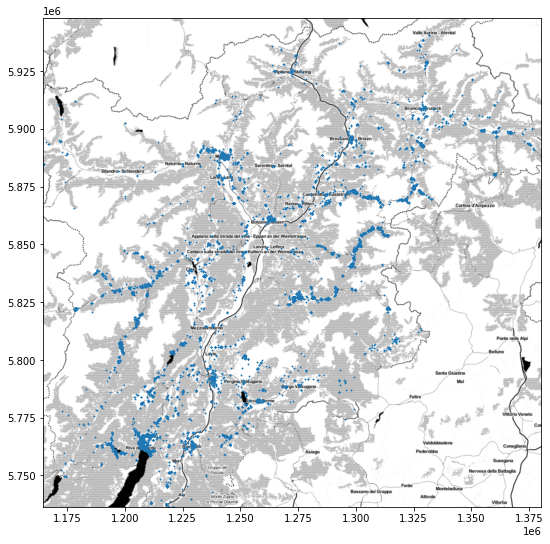

In [119]:
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Add map tiles for context
ax.imshow(basemap, extent=basemap_extent, interpolation='bilinear')
# Plot points
ax.scatter(geo_airbnb['x'], geo_airbnb['y'], s=0.75) #s = size
# Limit the axis
ax.axis(data_extent)
# Display
plt.show()

this representation displays all points on the map.<br/>
The proposed scale level doesn't show where the greatest concentration is or if there are concentric points (e.g. several apartments, on several levels, in the same building).<br/>

The view in dots can then create a map that hides this information.

### plot Hexagons

A good alternative to understand where is the concentration of the points in some areas is to use a hexagonal grid using different colors

The use of hexagonal binning (sometimes called hexbin) has nicer properties than squared grids, such as larger flexibility in the shape and better connectivity between cells.

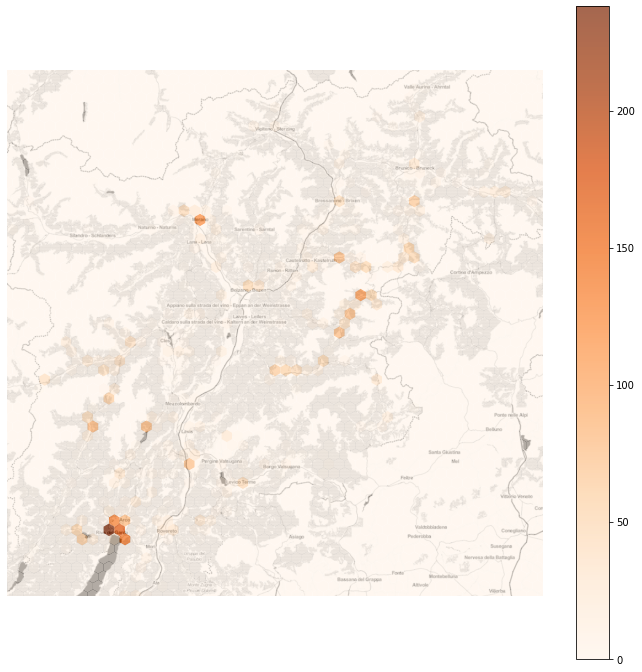

In [120]:
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(12, 12))
# Add map tiles for context
ax.imshow(basemap, extent=basemap_extent, interpolation='bilinear')
# Generate and add hexbin with 50 hexagons in each 
# dimension, no borderlines, 70% transparency (alpha),
# and the reverse Oranges colormap
hb = ax.hexbin(x=geo_airbnb['x'], 
               y=geo_airbnb['y'],
               gridsize=50, linewidths=0,
               alpha=0.7, cmap='Oranges')
ax.axis(data_extent)
# Add colorbar
plt.colorbar(hb)
# Remove axes
ax.set_axis_off()

an now we can see where are the areas with more concentrations

### plot heatmap (KDE)
Kernel Density Estimation (KDE) a non-parametric way to estimate the probability density function of a random variable.<br/>
The results is complete coverage of the extent area of the dataset (also where there aren't points)
<br/><br/>

"KDE lays a grid of points over the space of interest on which it places kernel functions that count points around them with different weight based on the distance. These counts are then aggregated to generate a global surface with probability. The most common kernel function is the gaussian one, which applies a normal distribution to weight points. The result is a continuous surface with a probability function that may be evaluated at every point"

we can calculate the KDE with [seaborn](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)

source [Rey, S.J., D. Arribas-Bel, and L.J. Wolf (2020) "Geographic Data Science with PySAL and the PyData Stack”.](https://geographicdata.science/book/notebooks/08_point_pattern_analysis.html#kernel-density-estimation-kde)

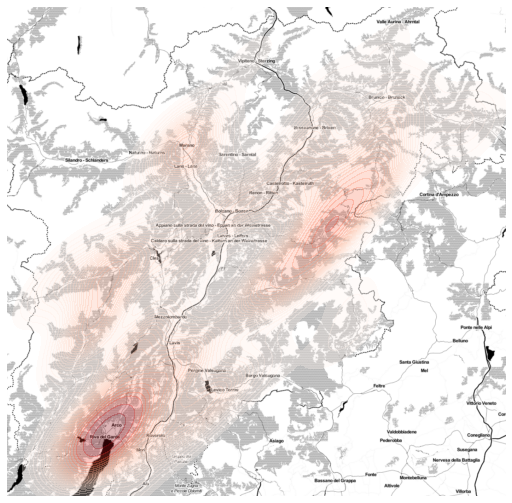

In [121]:
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Add map tiles for context
ax.imshow(basemap, extent=basemap_extent, interpolation='bilinear')
# Generate and add KDE with a shading of 30 gradients 
# coloured contours, 30% of transparency (alpha),
# and the reverse Reds colormap
sns.kdeplot(x=geo_airbnb['x'], y=geo_airbnb['y'],
                n_levels=30, shade=True,
                alpha=0.3, cmap='Reds')
# Remove axes
ax.axis(data_extent)
ax.set_axis_off()

### create and plot cluster

another way to better understand where is the main concentration of points is the use of cluster

A common algorithm to identify clusters of points, based on their density across space, is [DBSCAN](https://en.wikipedia.org/wiki/DBSCAN) - Density-based spatial clustering of applications with noise.<br/>
For this method, a cluster is a concentration of at least *m* points, each of them within a distance of *r* of at least another point in the cluster.

A python implementation is with [scikit learn](https://scikit-learn.org/stable/modules/clustering.html#dbscan)

In [122]:
from sklearn.cluster import dbscan
import numpy as np

Compute DBSCAN
<br/>&nbsp;&nbsp;&nbsp;obtain the number of points **1%** of the total represents


In [123]:
minp = np.round(geo_airbnb.shape[0] * 0.01)
minp

62.0

&nbsp;&nbsp;&nbsp;obtain the cluster of points within **800 meters** for the number of point *1%* of the total represents

In [124]:
clusterindexes, labels = dbscan(geo_airbnb[['x', 'y']], eps=800, min_samples=minp)

In [125]:
len(clusterindexes)

578

In [126]:
labels = pd.Series(labels, index=geo_airbnb.index)

**-1** is the value to identify the points that are **not part of any cluster** (*noise*)

In [127]:
labels.unique()

array([-1,  0,  6,  1,  5,  2,  3,  4])

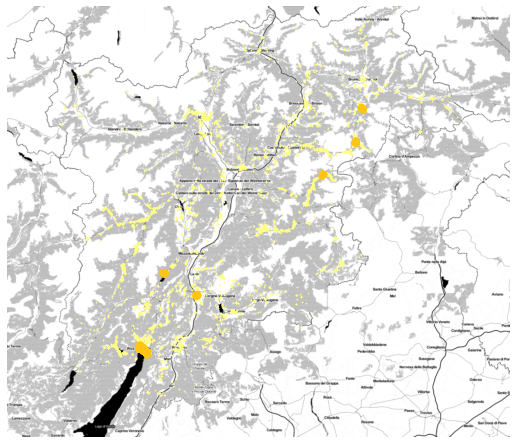

In [128]:
# Setup figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Add base layer with tiles for context
ax.imshow(basemap, extent=basemap_extent, interpolation='bilinear')

# Subset points that are not part of any cluster (noise)
noise = geo_airbnb.loc[labels==-1, ['x', 'y']]
# Plot noise in butter color
ax.scatter(noise['x'], noise['y'], c='xkcd:butter', s=3, linewidth=0)


# Plot all points that are not noise in sunflower color
# NOTE how this is done through some fancy indexing, where
#      we take the index of all points (tw) and substract from
#      it the index of those that are noise
ax.scatter(geo_airbnb.loc[geo_airbnb.index.difference(noise.index), 'x'], \
           geo_airbnb.loc[geo_airbnb.index.difference(noise.index), 'y'], \
          c='xkcd:sunflower', linewidth=0)

# Remove axes
ax.set_axis_off()
# Display the figure
plt.show()



# Plot polygons

In [129]:
url_italian_administrative_units="https://github.com/napo/geospatial_course_unitn/raw/master/data/istat/istat_administrative_units_generalized_2021.gpkg"

In [130]:
italian_regions = gpd.read_file(url_italian_administrative_units,layer="regions")

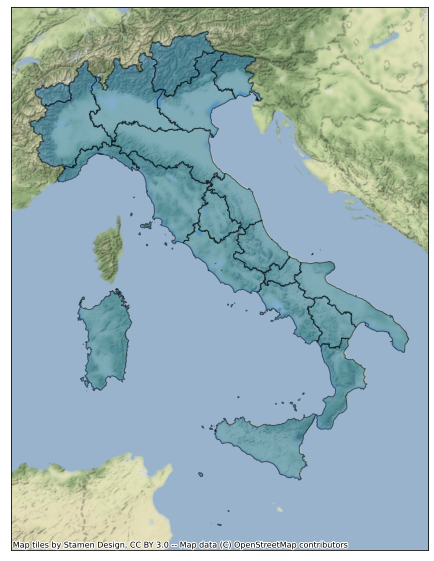

In [131]:
ax = italian_regions.to_crs(epsg=3857).plot(figsize=(10, 10), alpha=0.5, edgecolor='black')
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
ctx.add_basemap(ax,source=ctx.providers.Stamen.TerrainBackground)

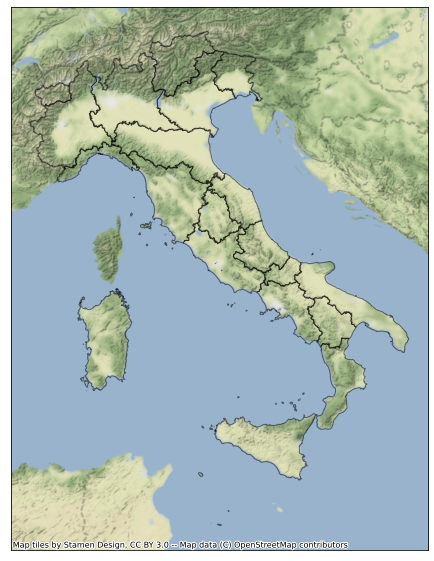

In [132]:
ax = italian_regions.to_crs(epsg=3857).plot(figsize=(10, 10), facecolor="none",alpha=0.5, edgecolor='black')
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
ctx.add_basemap(ax,source=ctx.providers.Stamen.TerrainBackground)

## add labes

to add the labels we need the for each

In [133]:
representative_points = gpd.GeoDataFrame(italian_regions.representative_point()).reset_index()

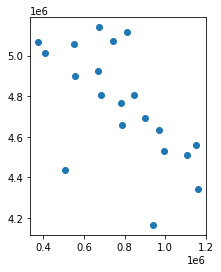

In [134]:
italian_regions.representative_point().plot()
plt.show()

In [135]:
representative_points.head(3)

index                               0
0      0  POINT (408386.435 5012411.563)
1      1  POINT (373437.480 5065107.693)
2      2  POINT (552411.517 5056417.446)

In [136]:
representative_points = representative_points.rename(columns={0:'geometry'}).set_geometry('geometry')

In [137]:
representative_points.head(3)

index                        geometry
0      0  POINT (408386.435 5012411.563)
1      1  POINT (373437.480 5065107.693)
2      2  POINT (552411.517 5056417.446)

obtain the list of the labels ( = names of the regions )

In [138]:
italian_regions.DEN_REG

0                  Piemonte
1             Valle d'Aosta
2                 Lombardia
3       Trentino-Alto Adige
4                    Veneto
5     Friuli Venezia Giulia
6                   Liguria
7            Emilia-Romagna
8                   Toscana
9                    Umbria
10                   Marche
11                    Lazio
12                  Abruzzo
13                   Molise
14                 Campania
15                   Puglia
16               Basilicata
17                 Calabria
18                  Sicilia
19                 Sardegna
Name: DEN_REG, dtype: object

In [139]:
labels = italian_regions.DEN_REG.to_frame().reset_index()

In [140]:
labels.head(3)

index        DEN_REG
0      0       Piemonte
1      1  Valle d'Aosta
2      2      Lombardia

.. and create a new geodataframe

In [141]:
representative_points = representative_points.merge(labels,on="index")

In [142]:
representative_points = representative_points.rename(columns={'DEN_REG':'names'})

In [143]:
representative_points = representative_points.rename(columns={0:'geometry'})

In [144]:
representative_points = gpd.GeoDataFrame(representative_points,geometry=representative_points['geometry'],crs=4326)

plot the two layers

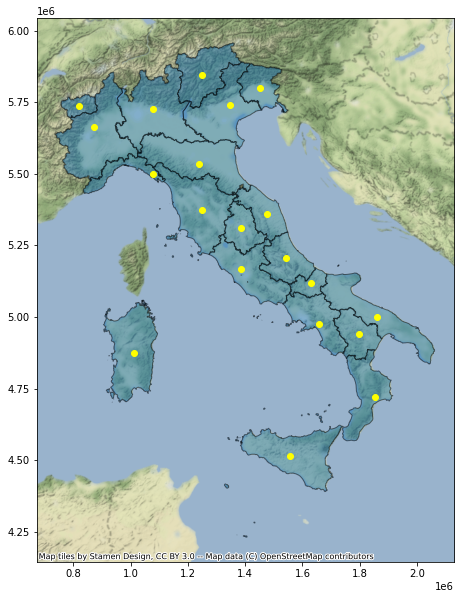

In [145]:
f, ax = plt.subplots(1,figsize = (10, 10))
italian_regions.to_crs(epsg=3857).plot(ax=ax,figsize=(10,10), alpha=0.5, edgecolor="black")
representative_points.to_crs(epsg=3857).plot(ax=ax,color='yellow')
ctx.add_basemap(ax,source=ctx.providers.Stamen.TerrainBackground)
plt.show()

extract all the labels from the geodataframe and plot it in each position

*plt.text(x, y, label, fontsize = 8,fontweight='bold')* 


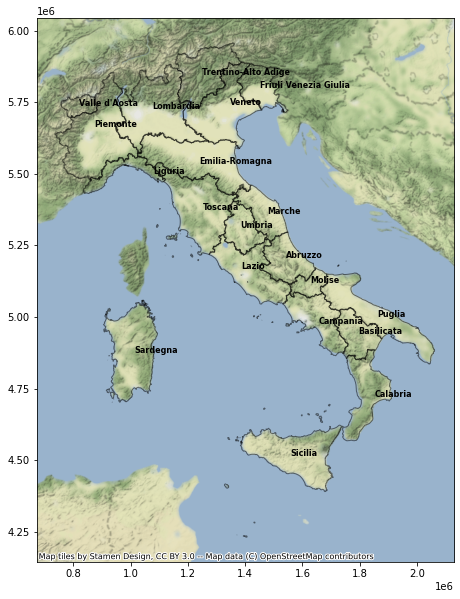

In [146]:
texts = []
f, ax = plt.subplots(1,figsize = (10, 10))
italian_regions.to_crs(epsg=3857).plot(ax=ax,figsize=(10,10), facecolor="none", alpha=0.5, edgecolor="black")
for x, y, label in zip(representative_points.to_crs(epsg=3857).geometry.x, representative_points.to_crs(epsg=3857).geometry.y, representative_points["names"]):
    texts.append(plt.text(x, y, label, fontsize = 8, color="black",fontweight='bold'))
ctx.add_basemap(ax,source=ctx.providers.Stamen.TerrainBackground)

# Choropleth maps

Choropleth maps play a prominent role in geographic data science as they allow us to display non-geographic attributes or variables on a geographic map.<br/>The word choropleth stems from the root “choro”, meaning “region”. As such choropleth maps represent data at the region level, and are appropriate for areal unit data where each observation combines a value of an attribute and a geometric figure, usually a polygon.

source [Rey, S.J., D. Arribas-Bel, and L.J. Wolf (2020) "Geographic Data Science with PySAL and the PyData Stack”](https://geographicdata.science/book/notebooks/05_choropleth.html)


In [147]:
italian_regions.columns

Index(['COD_RIP', 'COD_REG', 'DEN_REG', 'geometry'], dtype='object')

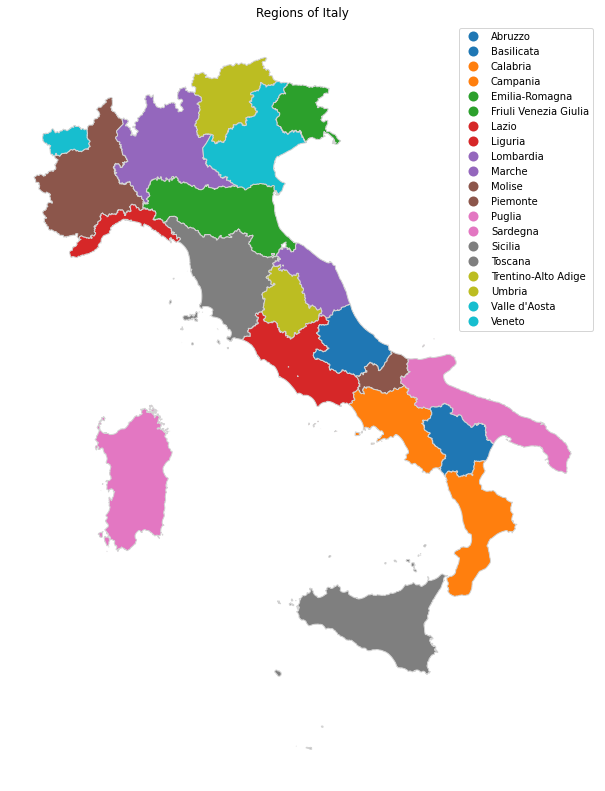

In [148]:
ax = italian_regions.plot(column='DEN_REG',legend=True,figsize=(14,14),edgecolor="lightgray")
ax.set_title("Regions of Italy")
ax.set_axis_off()
plt.show()

### Change of the color scale

the [color scale](https://matplotlib.org/users/colormaps.html) can be chosen to make those offered by maptplotlib

*DEN_REG* is a categorical variable that must highlight each region well without creating confusion, therefore it is suggested to choose a color scale from among those described as [*divergent*](https://matplotlib.org/tutorials/colors/colormaps.html#diverging)


**Tip**<br/>
A suggestion to choose a good color scale is [Color Brewer 2](https://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3)

![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/colorbrewer.png)


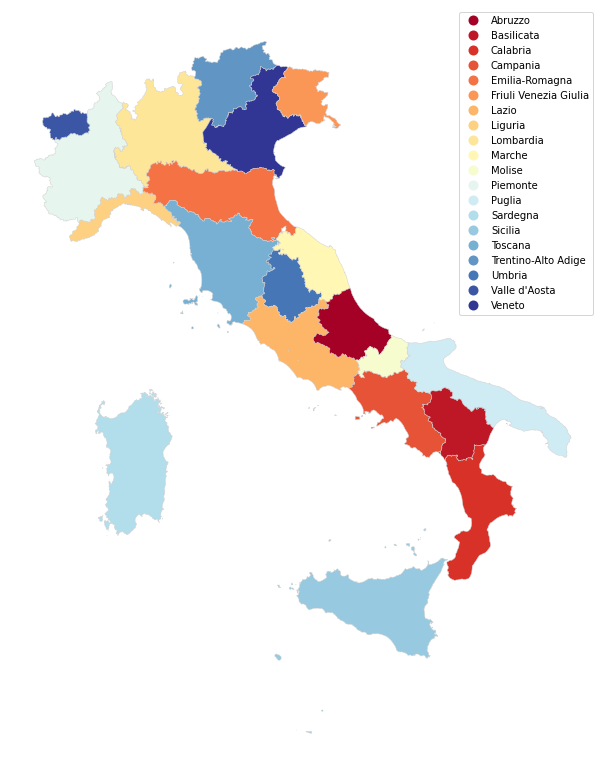

In [149]:
ax = italian_regions.plot(column='DEN_REG',legend=True,figsize=(14, 14),cmap="RdYlBu", edgecolor="lightgray", linewidth = 0.5)
ax.set_axis_off()
plt.show()

#### add attributes from other sources

**Goal**: generate a map with the number of people admitted to intensive care for covid-19 in each Italian region

source data<br/>
[COVID-19 in Italy](https://github.com/pcm-dpc/COVID-19)

Here the [dataset for the italian regions](https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni-latest.csv)

In [150]:
url='https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni-latest.csv'

In [151]:
covid19_italian_regions = pd.read_csv(url)

In [152]:
covid19_italian_regions.columns

Index(['data', 'stato', 'codice_regione', 'denominazione_regione', 'lat',
       'long', 'ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati', 'note',
       'ingressi_terapia_intensiva', 'note_test', 'note_casi',
       'totale_positivi_test_molecolare',
       'totale_positivi_test_antigenico_rapido', 'tamponi_test_molecolare',
       'tamponi_test_antigenico_rapido', 'codice_nuts_1', 'codice_nuts_2'],
      dtype='object')

In [153]:
covid19_italian_regions.head(5)

data stato  codice_regione denominazione_regione        lat  \
0  2021-11-24T17:00:00   ITA              13               Abruzzo  42.351222   
1  2021-11-24T17:00:00   ITA              17            Basilicata  40.639471   
2  2021-11-24T17:00:00   ITA              18              Calabria  38.905976   
3  2021-11-24T17:00:00   ITA              15              Campania  40.839566   
4  2021-11-24T17:00:00   ITA               8        Emilia-Romagna  44.494367   

        long  ricoverati_con_sintomi  terapia_intensiva  totale_ospedalizzati  \
0  13.398438                      94                  8                   102   
1  15.805148                      15                  2                    17   
2  16.594402                     123                 11                   134   
3  14.250850                     312                 21                   333   
4  11.341721                     560                 63                   623   

   isolamento_domiciliare  ...  \
0                    3589  ...   
1                     970  ...   
2                    3666  ...   
3                   14520  ...   
4                   15344  ...   

                                                note  \
0                                                NaN   
1  Il numero totale dei decessi ne comprende n. 2...   
2  L'Asp di Catanzaro comunica un positivo nel se...   
3                                                NaN   
4  Sono stati eliminati 2 casi, positivi a test a...   

   ingressi_terapia_intensiva  note_test  \
0                           1        NaN   
1                           1        NaN   
2                           3        NaN   
3                           2        NaN   
4                           6        NaN   

                                           note_casi  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3  dalla verifica giornaliera si evince che uno d...   
4                                                NaN   

   totale_positivi_test_molecolare  totale_positivi_test_antigenico_rapido  \
0                            86537                                       0   
1                            31382                                       0   
2                            91475                                      19   
3                           473055                                   11588   
4                           447946                                     422   

   tamponi_test_molecolare  tamponi_test_antigenico_rapido  codice_nuts_1  \
0                  1561022                         1279794            ITF   
1                   473687                           25608            ITF   
2                  1139660                          263499            ITF   
3                  5741787                         2064818            ITF   
4                  6505314                         3807131            ITH   

   codice_nuts_2  
0           ITF1  
1           ITF5  
2           ITF6  
3           ITF3  
4           ITH5  

[5 rows x 30 columns]

In [154]:
covid19_italian_regions.denominazione_regione.unique()

array(['Abruzzo', 'Basilicata', 'Calabria', 'Campania', 'Emilia-Romagna',
       'Friuli Venezia Giulia', 'Lazio', 'Liguria', 'Lombardia', 'Marche',
       'Molise', 'P.A. Bolzano', 'P.A. Trento', 'Piemonte', 'Puglia',
       'Sardegna', 'Sicilia', 'Toscana', 'Umbria', "Valle d'Aosta",
       'Veneto'], dtype=object)

*P. A. Bolzano* and *P.A. Trento* are provinces => these aren't present in the geographical dataset for the italian *regions*


The autonomous provinces of Trento and Bolzano, for some competences such as healthcare, are equated to the Italian regions.<br/>

So we need to create a layer that has this distinction<br/>
Here the sequences of the operations
1. delete the Trentino Alto Adige region from the original layer
1. extract the provinces of Trento and Bolzano
1. align the attributes of these two provinces with those of the regions
1. merge the extracted geometries to the regions layer

**delete the Trentino Alto Adige region from the original layer**

In [155]:
italian_regions[italian_regions.COD_REG == 4]

COD_RIP  COD_REG              DEN_REG  \
3        2        4  Trentino-Alto Adige   

                                            geometry  
3  MULTIPOLYGON (((743267.749 5219765.793, 743387...

In [156]:
italian_regions = italian_regions[italian_regions.COD_REG != 4]

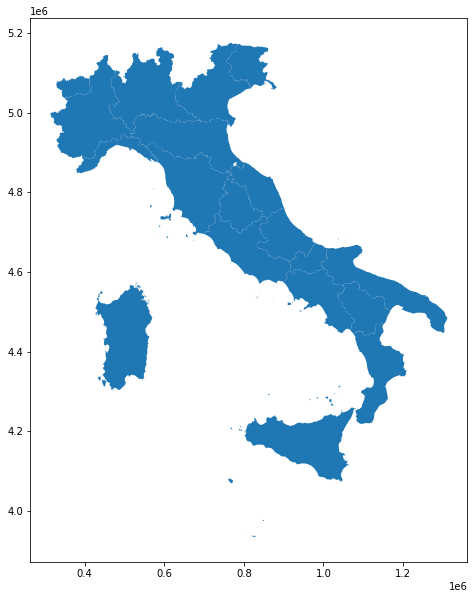

In [157]:
italian_regions.plot(figsize=(10,10))
plt.show()

**extract the provinces of Trento and Bolzano**

In [158]:
italian_provincies = gpd.read_file(url_italian_administrative_units,layer="provincies")

In [159]:
trento_bolzano = italian_provincies[italian_provincies.COD_REG==4]

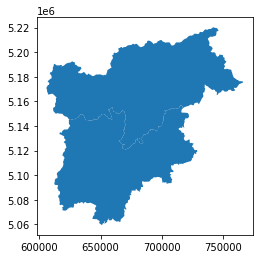

In [160]:
trento_bolzano.plot()
plt.show()

In [161]:
trento_bolzano

COD_RIP  COD_REG  COD_PROV  COD_CM  COD_UTS DEN_PROV DEN_CM  DEN_UTS  \
20        2        4        21       0       21  Bolzano      -  Bolzano   
21        2        4        22       0       22   Trento      -   Trento   

   SIGLA            TIPO_UTS  \
20    BZ  Provincia autonoma   
21    TN  Provincia autonoma   

                                             geometry  
20  MULTIPOLYGON (((743267.749 5219765.793, 743387...  
21  MULTIPOLYGON (((716676.337 5153931.623, 716029...

**align the attributes of these two provinces with those of the regions**

In [162]:
trento_bolzano = trento_bolzano.drop(columns=['COD_REG'])

In [163]:
trento_bolzano.rename(columns={'COD_PROV':'COD_REG'},inplace=True)

In [164]:
trento_bolzano.rename(columns={'DEN_PROV':'DEN_REG'},inplace=True)

In [165]:
italian_regions.columns

Index(['COD_RIP', 'COD_REG', 'DEN_REG', 'geometry'], dtype='object')

In [166]:
trento_bolzano.columns

Index(['COD_RIP', 'COD_REG', 'COD_CM', 'COD_UTS', 'DEN_REG', 'DEN_CM',
       'DEN_UTS', 'SIGLA', 'TIPO_UTS', 'geometry'],
      dtype='object')

In [167]:
trento_bolzano = trento_bolzano[['COD_RIP','COD_REG','DEN_REG','geometry']]

**append the extracted geometries to the regions layer**

In [168]:
italian_regions = italian_regions.append(trento_bolzano)

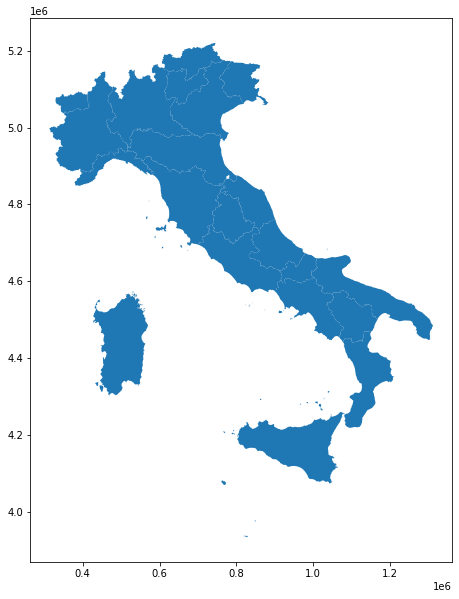

In [169]:
italian_regions.plot(figsize=(10,10))
plt.show()

**join the data to the geodataframe**



In [170]:
italian_regions.columns

Index(['COD_RIP', 'COD_REG', 'DEN_REG', 'geometry'], dtype='object')

In [171]:
covid19_italian_regions.columns

Index(['data', 'stato', 'codice_regione', 'denominazione_regione', 'lat',
       'long', 'ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati', 'note',
       'ingressi_terapia_intensiva', 'note_test', 'note_casi',
       'totale_positivi_test_molecolare',
       'totale_positivi_test_antigenico_rapido', 'tamponi_test_molecolare',
       'tamponi_test_antigenico_rapido', 'codice_nuts_1', 'codice_nuts_2'],
      dtype='object')

"*terapia_intensiva*" = "intensive care" 

"*codice_regione*" = "*COD_REG*" = the code assigned by the national institute of statistics to identify an italian region

**rename "COD_REG" to "codice_region" to have a common key**

In [172]:
italian_regions.rename(columns={'COD_REG':'codice_regione'},inplace=True)

In [173]:
geo_covid19_italian_regions = italian_regions.merge(covid19_italian_regions,on="codice_regione").reset_index()

In [174]:
geo_covid19_italian_regions.columns

Index(['index', 'COD_RIP', 'codice_regione', 'DEN_REG', 'geometry', 'data',
       'stato', 'denominazione_regione', 'lat', 'long',
       'ricoverati_con_sintomi', 'terapia_intensiva', 'totale_ospedalizzati',
       'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati', 'note',
       'ingressi_terapia_intensiva', 'note_test', 'note_casi',
       'totale_positivi_test_molecolare',
       'totale_positivi_test_antigenico_rapido', 'tamponi_test_molecolare',
       'tamponi_test_antigenico_rapido', 'codice_nuts_1', 'codice_nuts_2'],
      dtype='object')

In [175]:
from datetime import datetime

In [176]:
date_string = geo_covid19_italian_regions['data'].unique()[0]

In [177]:
day = datetime.strptime(date_string[:10], "%Y-%m-%d").strftime("%d %b %Y")

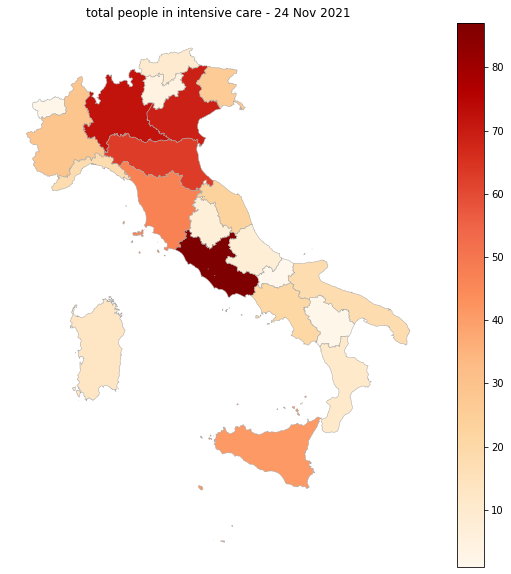

In [178]:
ax = geo_covid19_italian_regions.plot(column='terapia_intensiva',
                                      cmap="OrRd", edgecolor = "darkgrey", 
                                      linewidth = 0.5,legend=True,figsize=(10,10))
ax.set_axis_off()
ax.set_title('total people in intensive care - ' + day)
plt.show()

note:<br/>
this variable needs to be compared with at least the number of beds available for intensive care and the total population.

To the page
https://www.agenas.gov.it/covid19/web/index.php
There is a dashboard with these indicators.

The presented data can be reached at this json

https://www.agenas.gov.it/covid19/web/index.php?r=json/graph4

where the significant values are:
- x => percentage of beds in not critical area occupied by covid−19 patients
- y => percentage of intensive care beds occupied by covid-19 patients
- data1: patients hospitalized_with symptoms
- data2: total of beds in non-critical area
- data3: people in intensive_therapy
- data4: total of beds in intensive care


### Classification Schemes for Choropleth Maps

**Readings**
- [Choropleth Maps – A Guide to Data Classification](https://gisgeography.com/choropleth-maps-data-classification/)
- [Rey, S.J., D. Arribas-Bel, and L.J. Wolf (2020) "Geographic Data Science with PySAL and the PyData Stack”.](https://geographicdata.science/book/notebooks/05_choropleth.html)
- [What to consider when creating choropleth maps](https://blog.datawrapper.de/choroplethmaps/) - Lisa Charlotte Rost, Datawrapper
- [How to choose the best interpolation for your choropleth map](https://academy.datawrapper.de/article/117-color-palette-for-your-map)



with geopandas it's possible use the schemas made by [mapclassify](https://github.com/pysal/mapclassify)


Here some examples: 

#### Equal intervals

the distribution of the data is divide in bins which the same width in the value space


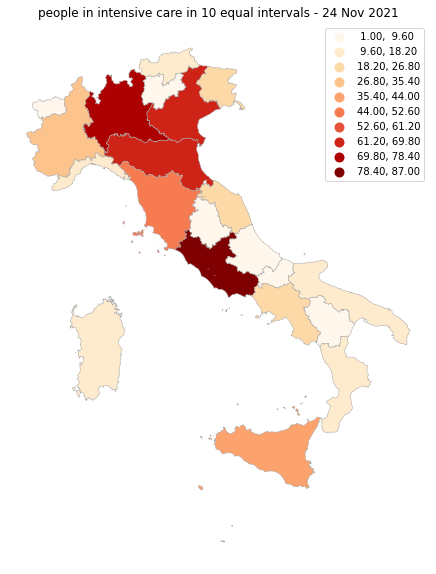

In [179]:
ax = geo_covid19_italian_regions.plot(column='terapia_intensiva',
                                      cmap="OrRd", edgecolor = "darkgrey", 
                                      linewidth = 0.5,legend=True,figsize=(10,10),
                                      scheme="equal_interval",
                                      k=10)
ax.set_title('people in intensive care in 10 equal intervals - ' + day)

ax.set_axis_off()
plt.show()

#### Quantiles

quantiles are cut points dividing the observations in a sample in the same way.

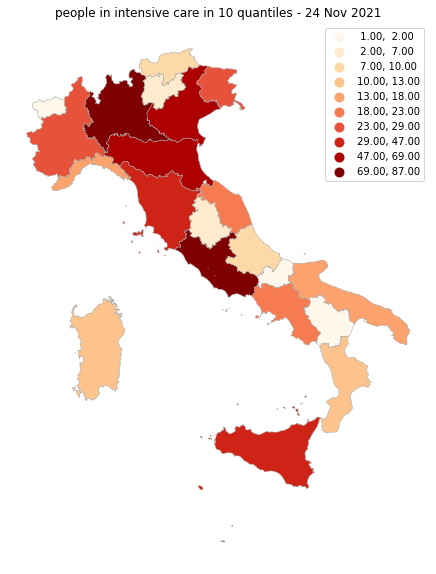

In [180]:
ax = geo_covid19_italian_regions.plot(column='terapia_intensiva',
                                      cmap="OrRd", edgecolor = "darkgrey", 
                                      linewidth = 0.5,legend=True,figsize=(10,10),
                                      scheme="quantiles",
                                      k=10)
ax.set_axis_off()
ax.set_title('people in intensive care in 10 quantiles - ' + day)

plt.show()

#### Percentiles

A percentile  indicating the value below which a given percentage of observations in a group of observations falls.

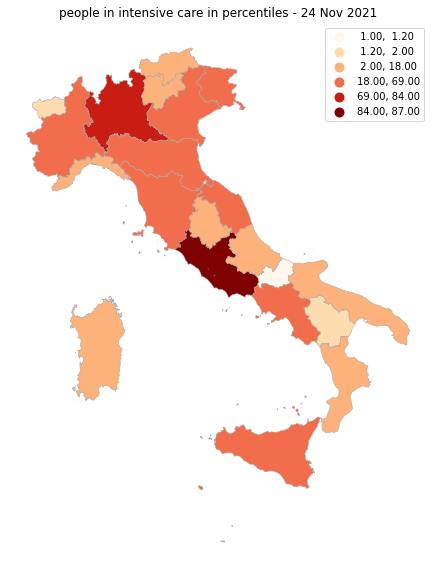

In [181]:
ax = geo_covid19_italian_regions.plot(column='terapia_intensiva',
                                      cmap="OrRd", edgecolor = "darkgrey", 
                                      linewidth = 0.5,legend=True,figsize=(10,10),
                                      scheme="percentiles")
ax.set_axis_off()
ax.set_title('people in intensive care in percentiles - ' + day)

plt.show()

#### Natural Breaks

this method seeks to reduce the variance within classes and maximize the variance between classes.

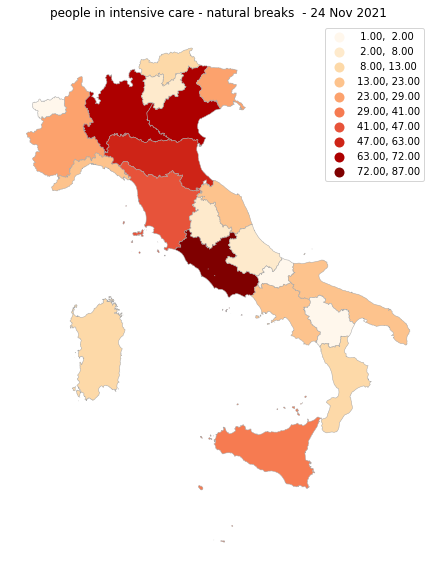

In [182]:
ax = geo_covid19_italian_regions.plot(column='terapia_intensiva',
                                      cmap="OrRd", edgecolor = "darkgrey", 
                                      linewidth = 0.5,legend=True,figsize=(10,10),
                                      scheme="naturalbreaks",
                                      k=10)
ax.set_axis_off()
ax.set_title('people in intensive care - natural breaks  - ' + day)

plt.show()

# Important notes in using geospatial visualizations

XKCD's suggestion :)

<img src="https://imgs.xkcd.com/comics/heatmap_2x.png" width="500px" />

source: [https://xkcd.com/1138/](https://xkcd.com/1138/)

explanation: [https://www.explainxkcd.com/wiki/index.php/1138:_Heatmap](https://www.explainxkcd.com/wiki/index.php/1138:_Heatmap)



---




![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/election_data_usa.gif)

[source](http://try-to-impeach-this.jetpack.ai/)

---
# Exercise<br/>
create maps with distribution of votes by polling station (seggi elettorali) of the mayoral candidates of the municipal 2020 of Trento<br/>
Data available here:
- [election data for mayor of Trento 2020](https://github.com/napo/geospatial_course_unitn/tree/master/data/election_data_trento)